# Load Dataset

In [1137]:
import pandas as pd
import numpy as np
df = pd.read_csv('./results/calibration_image_data.csv', sep=',',decimal='.')
df.head()

,img_num,target_aruco,img_name,carriage_x_dist,carriage_y_dist,carriage_x_undist,carriage_y_undist,carriage_x_dist_warp,carriage_y_dist_warp,carriage_x_undist_warp,...,target_x_undist_warp,target_y_undist_warp,angle_dist,angle_undist,angle_dist_warp,angle_undist_warp,aruco_flipper_76_x,aruco_flipper_76_y,aruco_flipper_77_x,aruco_flipper_77_y
0,1,13,img_1,544.5,992.5,553.0,977.0,400.31912,562.67110,404.95688,...,1075.6592,533.5369,-45.318967,-44.965699,-45.724640,-45.371082,787.5,1216.5,872.5,1132.5
1,2,13,img_2,766.5,1279.0,779.5,1263.0,628.63520,853.44150,636.84656,...,1075.6592,533.5369,-80.865582,-81.058877,-81.381218,-81.594101,1040.0,1397.0,1061.5,1264.0
2,3,13,img_3,1098.0,1389.0,1113.5,1372.5,965.78076,963.85480,975.10920,...,1075.6592,533.5369,-112.082651,-112.521870,-112.468086,-112.970047,1335.0,1408.0,1278.5,1272.0
3,4,13,img_4,1514.0,1196.5,1530.0,1183.5,1384.80680,766.92880,1393.20030,...,1075.6592,533.5369,-151.987874,-152.078318,-152.130371,-152.306992,1060.0,854.0,749.0,689.0
4,5,13,img_5,1514.5,398.5,1527.0,392.0,1378.65440,-43.00896,1383.22790,...,1075.6592,533.5369,132.190351,132.707685,131.770874,132.289185,749.0,1265.0,857.5,1148.0


# Select desired columns

In [1138]:
x = df[['target_x_undist', 'target_y_undist','angle_undist']]
y = df[['carriage_x_undist','carriage_y_undist']]

In [1139]:
x = x.rename(columns={'target_x_undist':  'x', 
                      'target_y_undist':  'y',
                      'angle_undist': 'angle',
})  
y = y.rename(columns={'carriage_x_undist':  'x_carriage', 
                     'carriage_y_undist':  'y_carriage',
})  

#y=y['x_carriage']
#y=y['y_carriage']

# Normalize Dataset

In [1140]:
max_x=5184
max_y=3456
max_angle=180

x['x']=x['x']/max_x
x['y']=x['y']/max_y
real_angle=x['angle'].copy()
x['angle']=x['angle']/max_angle


# Add custom columns dataset

In [1141]:
#x['x2']=x['x']**2
#x['y2']=x['y']**2
#x['xy']=x['x']*x['y']
#x['sqrt x']=np.sqrt(x['x'])
#x['sqrt y']=np.sqrt(x['y'])
#x['1/x']=1/(x['x'])
#x['1/y']=1/(x['y'])
#x['1/x2']=1/(x['x2'])
#x['1/y2']=1/(x['y2'])
#x['1/xy']=1/(x['xy'])
#x['log x']=np.log(x['x'])
#x['log y']=np.log(x['y'])
#x['exp x']=np.exp(x['x'])
#x['exp y']=np.exp(x['y'])
x['cos']=np.cos(real_angle*np.pi/180)
x['sin']=np.sin(real_angle*np.pi/180)
x['cos2']=x['cos']**2
x['sin2']=x['sin']**2
x['1/cos']=1/x['cos']
x['1/sin']=1/x['sin']
x=x.drop(columns=['angle'])
#x=x.drop(columns=['x'])
#x=x.drop(columns=['y'])

# Split Dataset

In [1142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

# Linear regressor

In [1143]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [1144]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

27.656190270170576 0.9992089641062226


Text(0.5, 1.0, 'true vs predicted')

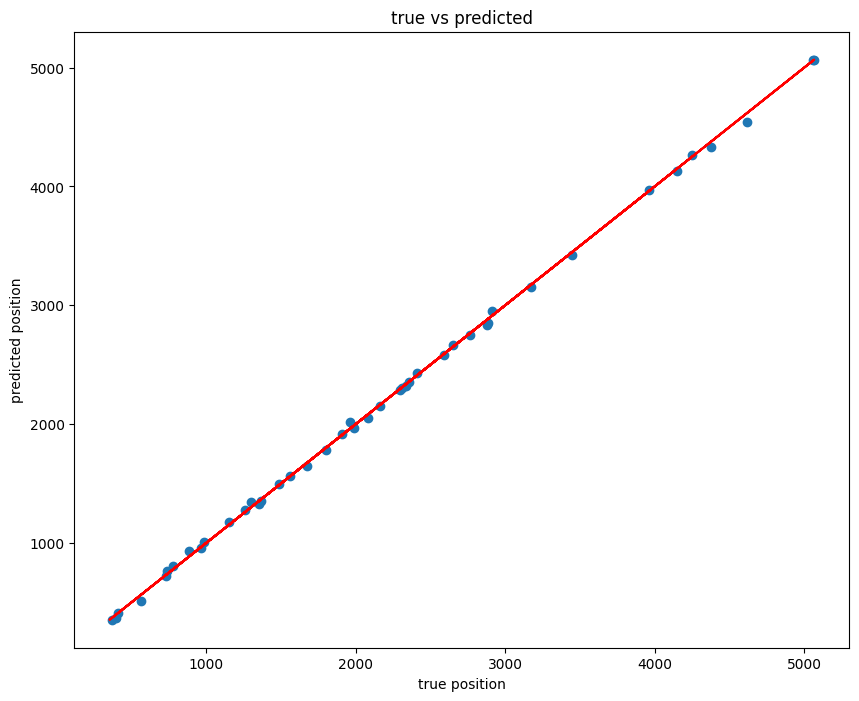

In [1145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

In [1146]:
import statsmodels.api as sm

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

ValueError: shapes (107,2) and (107,2) not aligned: 2 (dim 1) != 107 (dim 0)

In [ ]:
y.shape

(107,)